# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
# Importing Libraries

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

---
# Copying Dataste to colab runtime

Copying the dataset: We use the function shutil.copytree to duplicate the entire directory from Google Drive to our local file system in Colab. This function copies the folder structure along with all files inside, preserving the hierarchy of subfolders such as “yes” and “no.”

Local dataset path: We are storing the dataset in /content/brain_tumor_dataset within Colab. Saving data locally in Colab can often be faster than reading directly from Drive because local file operations are quicker and do not require the overhead of synchronizing with Google Drive.

Cleaning up: Before we copy, we check whether a folder named brain_tumor_dataset already exists locally. If it does, we remove that folder using shutil.rmtree. This helps prevent file mix-ups or errors that might occur if two folders have the same name.



In [ ]:
import os
import shutil

# The original dataset path on Google Drive, containing 'no' and 'yes' subfolders
drive_dataset_path = "/content/drive/MyDrive/brain_mri_dataset"

# The local path in Colab where we will copy the dataset
local_dataset_path = "/content/brain_tumor_dataset"

# If a local folder with the same name already exists, we remove it to avoid duplication
if os.path.exists(local_dataset_path):
    shutil.rmtree(local_dataset_path)

# We copy the entire directory from Google Drive to Colab's local file system
shutil.copytree(drive_dataset_path, local_dataset_path)

# We print a confirmation message and list the subfolders (classes) that were copied
print("Dataset copied to local Colab folder:", local_dataset_path)
print("Classes found:", os.listdir(local_dataset_path))

Dataset copied to local Colab folder: /content/brain_tumor_dataset
Classes found: ['yes', 'no', 'brain_tumor_dataset']


---
# Step 2: Rename the Files

making sure our filenames are consistent is very important , as you can see below , the file names for 'no' are in different formats from the 'yes' files so let us

In [ ]:
import os

# Path to the local copy of the dataset in Colab (two class folders: "no" and "yes")
local_dataset_path = "/content/brain_tumor_dataset"

print(">>> ORIGINAL FILE NAMES <<<")
class_dirs = ["no", "yes"]  # Our two classes

# We iterate over each class folder and display a few file names
for class_dir in class_dirs:
    folder_path = os.path.join(local_dataset_path, class_dir)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"\nClass '{class_dir}' has {len(files)} files.")
        # Show up to the first 5 file names for a quick preview
        print("Sample file names:", files[:5])

>>> ORIGINAL FILE NAMES <<<

Class 'no' has 98 files.
Sample file names: ['32 no.jpg', 'no 95.jpg', 'no 92.jpg', '49 no.jpg', '4 no.jpg']

Class 'yes' has 155 files.
Sample file names: ['Y254.jpg', 'Y97.JPG', 'Y115.JPG', 'Y182.JPG', 'Y249.JPG']


Why rename the files? We want a consistent naming convention so that all images in the “no” folder start with ‘N’ and all images in the “yes” folder start with ‘Y.’ This helps keep things organized and makes it easier to visually confirm which class an image belongs to when browsing files.

Checking file types: We use os.path.isfile to ensure we only rename actual image files and not subdirectories or other non-file entries.

Prepending ‘N_’ or ‘Y_’: If a file in the “no” folder does not already start with an N, we rename it to begin with N_. Similarly, if a file in the “yes” folder does not start with a Y, we rename it to begin with Y_. This step is repeated for every file in each subfolder.

In [ ]:
import os

# The local dataset path in Colab
local_dataset_path = "/content/brain_tumor_dataset"

# The two class folders: "no" and "yes"
class_dirs = ["no", "yes"]

# We iterate over each class folder
for class_dir in class_dirs:
    folder_path = os.path.join(local_dataset_path, class_dir)

    # Gather all the files in this folder
    files = os.listdir(folder_path)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]

    # Enumerate the files so we have an index (i) and a filename (file_name)
    for i, file_name in enumerate(files):
        old_file_path = os.path.join(folder_path, file_name)

        # We'll create a new file name with a zero-padded index (e.g., 001, 002...)
        # If the folder is 'no', we use 'N'; if 'yes', we use 'Y'
        if class_dir == "no":
            new_file_name = f"N{(i+1):03d}.jpg"  # e.g. N001.jpg, N002.jpg, ...
        else:
            new_file_name = f"Y{(i+1):03d}.jpg"  # e.g. Y001.jpg, Y002.jpg, ...

        # Build the full path for the new filename
        new_file_path = os.path.join(folder_path, new_file_name)

        # Rename the file on disk
        os.rename(old_file_path, new_file_path)

print(">>> All files have been systematically renamed! <<<")

>>> All files have been systematically renamed! <<<


## Verifying the names of files

In [ ]:
import os

local_dataset_path = "/content/brain_tumor_dataset"
class_dirs = ["no", "yes"]

print(">>> Renamed files: Quick Preview <<<")
for class_dir in class_dirs:
    folder_path = os.path.join(local_dataset_path, class_dir)
    renamed_files = os.listdir(folder_path)
    renamed_files = [f for f in renamed_files if os.path.isfile(os.path.join(folder_path, f))]

    # Sort them just to see them in ascending numerical order
    renamed_files.sort()

    print(f"\nClass '{class_dir}' has {len(renamed_files)} renamed files.")
    # Show the first few renamed filenames for confirmation
    print("Sample file names:", renamed_files[:5])


>>> Renamed files: Quick Preview <<<

Class 'no' has 98 renamed files.
Sample file names: ['N001.jpg', 'N002.jpg', 'N003.jpg', 'N004.jpg', 'N005.jpg']

Class 'yes' has 152 renamed files.
Sample file names: ['Y001.jpg', 'Y002.jpg', 'Y003.jpg', 'Y004.jpg', 'Y005.jpg']


After renaming, it’s good practice to verify that the files have indeed been renamed correctly:

We list the files again in each class folder.

We sort the filenames so that they appear in ascending order (i.e., N001, N002, N003...). This step makes it easy to see if they match the expected pattern.

We print out the first few filenames to confirm that they all have the desired Nxxx or Yxxx format.

By doing this, we can be certain our renaming step worked as intended and that our dataset now has a consistent, organized naming convention.









---
# Balancing the dataset and SPlitting into Train Test Val

We previously observed that the original dataset has an **unequal number of images in each class**. This imbalance could cause a** model to learn biases, favoring the class with more examples**. To address this we  decided on a strategy that enforces an **equal number of images from each class in the training set** (for example, selecting the same number of “yes” and “no” images) while distributing leftover images into validation and test sets. This approach ensures that the classifier is not inherently skewed toward any particular class, leading to more robust and fair performance across the dataset.

In [ ]:
import os

# Assume there are two class folders: "no" and "yes"
dataset_path = "/content/brain_tumor_dataset"
class_dirs = ["no", "yes"]

counts = {}
total_images = 0

# Count the number of images in each class
for class_dir in class_dirs:
    folder_path = os.path.join(dataset_path, class_dir)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    counts[class_dir] = len(files)
    total_images += len(files)

# Print the distribution
print("Class Distribution:")
for class_dir in class_dirs:
    print(f"  {class_dir}: {counts[class_dir]} images")

# Check balance
if counts["no"] != counts["yes"]:
    print("\nObservation: The dataset is not balanced.")
    diff = abs(counts["no"] - counts["yes"])
    print(f"The difference between classes is {diff} images.")
else:
    print("\nObservation: The dataset is balanced.")

Class Distribution:
  no: 98 images
  yes: 152 images

Observation: The dataset is not balanced.
The difference between classes is 54 images.


---
## Spliting Paths

### Define Paths and Parameters
- The dataset is located in `/content/brain_tumor_dataset`, and the split data will be saved in `/content/split_balanced`.
- The code is set to choose **75 images per class** for the training set. This fixed number helps ensure that both the “no” and “yes” classes are equally represented in training, reducing any bias.

### Clean-Up and Setup
- Any existing split folder is deleted to start fresh.
- New folders for **train**, **val**, and **test** are created.

### Splitting Logic
- For each class, the code shuffles the list of image files to randomize the selection.
- It then selects up to **75 images** for the training set.
- The remaining images (if any) are split equally into validation and test sets.

### Copying Files
- The files are copied (not moved) into subfolders (e.g., `train/no`, `train/yes`, `val/no`, etc.), ensuring that the training set is balanced.

### Summary Output
- A summary is printed for each class, showing the total number of images and the counts in the train, validation, and test splits.


In [ ]:
import os
import random
import shutil

# Define the local path of the renamed dataset in Colab
local_dataset_path = "/content/brain_tumor_dataset"

# Define the output folder where the split data will be stored
local_output_path = "/content/split_balanced"

# Set the number of training images per class (75 in this case)
train_count_per_class = 75

# Set the ratios for splitting leftover images: 50% for validation, 50% for test
val_ratio = 0.5
test_ratio = 0.5  # not explicitly used since test gets the remainder

# List the class names (assumed to be two classes: "no" and "yes")
class_names = ["no", "yes"]

# Remove any existing output folder to ensure a clean split
if os.path.exists(local_output_path):
    shutil.rmtree(local_output_path)

# Create the main split directories (train, val, and test)
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(local_output_path, split), exist_ok=True)

# Iterate through each class folder and perform the split
for class_name in class_names:
    class_dir = os.path.join(local_dataset_path, class_name)
    # List only files (ignoring subdirectories)
    all_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Shuffle the list to ensure randomness in splitting
    random.shuffle(all_files)

    # Select up to 75 images for the training set (or all if fewer exist)
    train_files = all_files[:min(train_count_per_class, len(all_files))]

    # The remaining images will be split equally between validation and test
    leftover = all_files[min(train_count_per_class, len(all_files)):]
    val_count = int(len(leftover) * val_ratio)
    val_files = leftover[:val_count]
    test_files = leftover[val_count:]

    # Create subdirectories for each class within train, val, and test folders
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(local_output_path, split, class_name), exist_ok=True)

    # Helper function to copy files to the designated split folder
    def copy_files(file_list, split):
        for f in file_list:
            src = os.path.join(class_dir, f)
            dst = os.path.join(local_output_path, split, class_name, f)
            shutil.copy2(src, dst)

    # Copy the files into the corresponding folders
    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    # Print a summary for each class
    print(f"Class '{class_name}' splitting summary:")
    print(f"  Total images: {len(all_files)}")
    print(f"  Train: {len(train_files)}")
    print(f"  Val:   {len(val_files)}")
    print(f"  Test:  {len(test_files)}\n")

print("Splitting complete!")


Class 'no' splitting summary:
  Total images: 98
  Train: 75
  Val:   11
  Test:  12

Class 'yes' splitting summary:
  Total images: 152
  Train: 75
  Val:   38
  Test:  39

Splitting complete!


## Verifying the Split

In [ ]:
import os

splits = ["train", "val", "test"]
class_names = ["no", "yes"]

print("Final split verification:")
for split in splits:
    for class_name in class_names:
        split_dir = os.path.join(local_output_path, split, class_name)
        file_list = [f for f in os.listdir(split_dir) if os.path.isfile(os.path.join(split_dir, f))]
        print(f"{split.upper()} | Class '{class_name}': {len(file_list)} images")
    print()  # Blank line for readability


Final split verification:
TRAIN | Class 'no': 75 images
TRAIN | Class 'yes': 75 images

VAL | Class 'no': 11 images
VAL | Class 'yes': 38 images

TEST | Class 'no': 12 images
TEST | Class 'yes': 39 images



---
# FINAL SUMMARY OF WHAT WE DID AND HOW OT START

## Preprocessing and Folder Structure

### Folder Structure

After splitting the dataset, the directory structure is organized as follows:


In [ ]:
/content/split_balanced/
├── train/
│   ├── no/     # 75 balanced images from the "no" class for training
│   └── yes/    # 75 balanced images from the "yes" class for training
├── val/
│   ├── no/     # A portion of the remaining "no" images for validation
│   └── yes/    # A portion of the remaining "yes" images for validation
└── test/
    ├── no/     # The remaining "no" images for testing
    └── yes/    # The remaining "yes" images for testing


### Preprocessing Explanation

1. **Image Resizing**:  
   All images are resized to a fixed size (for example, 224x224 pixels). This step is essential because most deep learning models require input images of the same dimensions. Resizing ensures that the images fit the model's expected input size.

2. **Data Augmentation (for Training Data)**:  
   To increase the diversity of the training dataset and help the model generalize better, random horizontal and vertical flips are applied. These transformations simulate different perspectives of the images and reduce the risk of overfitting. Note that such augmentations are applied only to the training data—not to validation or test data—to keep those sets consistent.

3. **Normalization**:  
   Images are normalized using predefined mean and standard deviation values (commonly the ImageNet statistics: mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]). Normalization scales pixel values to a standard range, which speeds up the training process and helps the model converge more effectively.

### How to Start Training Models

1. **Setting Up Data Loaders**:  
   With the folder structure in place, you can use PyTorch’s `datasets.ImageFolder` to load the images from the `train`, `val`, and `test` directories. The data loaders batch the images and apply the defined transformations (resizing, augmentation, normalization) on the fly.

2. **Model Architecture**:  
   A popular approach is to use a pre-trained model (like ResNet18 from `torchvision.models`) and modify its final fully-connected layer to output the correct number of classes (2, in this case). Pre-trained models already have learned useful features, which can speed up the training process when fine-tuned on your dataset.

3. **Loss Function and Optimizer**:  
   Use the CrossEntropyLoss as the loss function, which is suitable for classification tasks. An optimizer such as Adam is then used to update the model’s weights based on the loss. This combination is standard practice in many image classification projects.

4. **Training Loop**:  
   Write a training loop that:
   - Iterates over the training data in batches.
   - Performs a forward pass to compute predictions.
   - Computes the loss between the predictions and the true labels.
   - Executes a backward pass to compute gradients.
   - Updates the model parameters using the optimizer.
   During training, the model is evaluated on the validation set to monitor performance and adjust hyperparameters if needed.

5. **Testing**:  
   After training, the model’s performance is evaluated on the test set. This step ensures that the model generalizes well to unseen data. Metrics like accuracy, precision, recall, and a confusion matrix can be computed to understand the model's strengths and weaknesses.

### Summary

- **Folder Structure**: The dataset is split into `train`, `val`, and `test` folders, with each split containing subfolders for the "no" and "yes" classes. The training set is balanced with exactly 75 images from each class.
- **Preprocessing**: Images are resized to a standard size, augmented (only for training) with random flips to enhance generalization, and normalized using standard values.
- **Training Setup**: Data loaders facilitate batch processing, a pre-trained model (e.g., ResNet18) is fine-tuned on the dataset, and a training loop is used to update model parameters based on the loss computed from predictions.
- **Evaluation**: Finally, testing on a separate test set ensures that the model performs well on new, unseen data.

This comprehensive process, explained in detailed yet straightforward language, ensures that even a beginner can understand how to preprocess the data, set up the folder structure, and start training a model on the balanced dataset.


# Data Loaders

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input images of expects 224x224 pixels
    transforms.ToTensor(), #converts image to a format that Pytorch understands
    transforms.Normalize([0.485, 0.456, 0.406],  # Imagenet means
                         [0.229, 0.224, 0.225])  # Imagenet stds - Rescales pixel values using the average and
                         #standard deviation from ImageNet (the dataset ResNet was trained on)
])

# Paths
data_dir = "/content/split_balanced"
batch_size = 16 #model will process 16 images at a time during training

# Loading datasets
train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

# DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)


**torchvision.transforms:** Used to resize, normalize, and convert images to tensors.

**datasets.ImageFolder:** Automatically loads images from folders with labels based on subfolder names.

**DataLoader:** Helps load the dataset in mini-batches, shuffles data, etc.

# Load and Modify ResNet-101


In [ ]:
from torchvision import models
import torch.nn as nn

# Load pretrained ResNet-101
model = models.resnet101(pretrained=True) #loads a ResNet-50 that has already been trained on millions of images (ImageNet)

# Freeze earlier layers (optional)
#Prevents the earlier layers from being updated while training.
#You only train the last fully connected (FC) layer. This is called transfer learning.

for param in model.parameters():
    param.requires_grad = False

# Replace the FC layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 classes: yes, no


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 140MB/s]


# Train the model

In [ ]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only train FC layer

# Training loop (basic version)
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels.data)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Accuracy: {100 * correct/len(train_data):.2f}%")


Epoch 1/15, Loss: 2.4157, Accuracy: 90.67%
Epoch 2/15, Loss: 2.1642, Accuracy: 90.67%
Epoch 3/15, Loss: 1.5301, Accuracy: 97.33%
Epoch 4/15, Loss: 1.4881, Accuracy: 95.33%
Epoch 5/15, Loss: 1.2223, Accuracy: 96.67%
Epoch 6/15, Loss: 0.9922, Accuracy: 97.33%
Epoch 7/15, Loss: 1.3082, Accuracy: 98.00%
Epoch 8/15, Loss: 1.7680, Accuracy: 93.33%
Epoch 9/15, Loss: 0.7830, Accuracy: 98.67%
Epoch 10/15, Loss: 1.4888, Accuracy: 96.00%
Epoch 11/15, Loss: 1.0430, Accuracy: 96.67%
Epoch 12/15, Loss: 1.2659, Accuracy: 94.67%
Epoch 13/15, Loss: 0.8689, Accuracy: 98.67%
Epoch 14/15, Loss: 0.8848, Accuracy: 99.33%
Epoch 15/15, Loss: 0.7158, Accuracy: 99.33%


# Validate/Test

In [ ]:
model.eval()
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels.data)

print(f"Test Accuracy: {100 * correct/len(test_data):.2f}%")


Test Accuracy: 84.31%


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print(confusion_matrix(all_labels, all_preds))
print(classification_report(all_labels, all_preds, target_names=train_data.classes))


[[ 8  4]
 [ 4 35]]
              precision    recall  f1-score   support

          no       0.67      0.67      0.67        12
         yes       0.90      0.90      0.90        39

    accuracy                           0.84        51
   macro avg       0.78      0.78      0.78        51
weighted avg       0.84      0.84      0.84        51



# Save and Load Trained Model

In [ ]:
# Save the trained model
torch.save(model.state_dict(), "resnet101_brainMRI.pth")
# Recreate the model structure
model = models.resnet101(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.load_state_dict(torch.load("resnet101_brainMRI.pth"))
model = model.to(device)
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Visualize Predictions on Test Images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


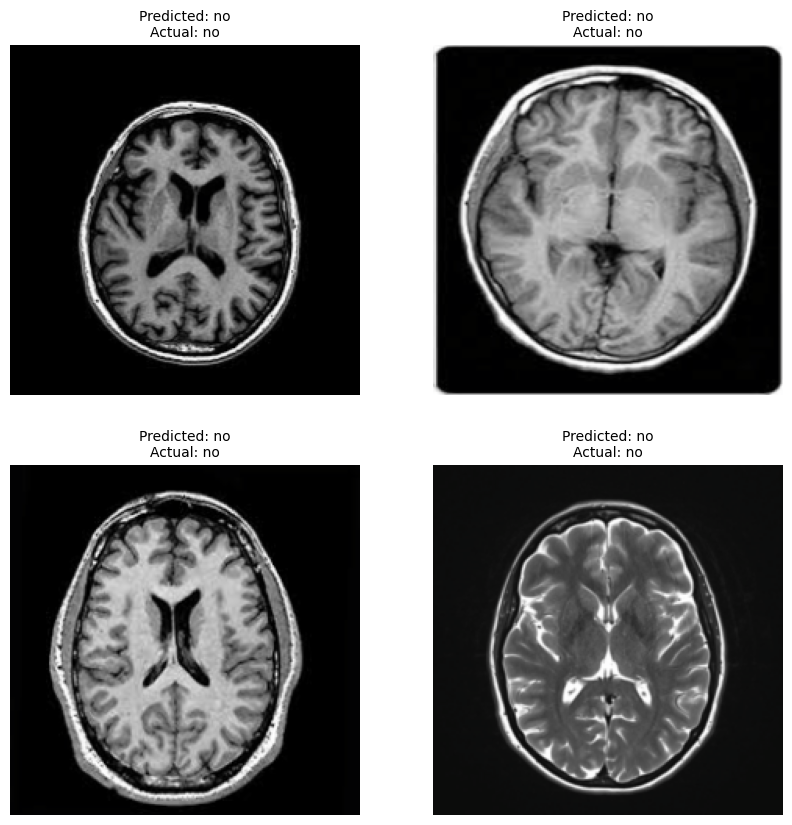

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))  # from (C, H, W) to (H, W, C)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # unnormalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')
class_names = train_data.classes

model.eval()
data_iter = iter(test_loader)
images, labels = next(data_iter)
images = images.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Plot the first 4 test images with predictions
plt.figure(figsize=(10, 10))
for idx in range(4):
    ax = plt.subplot(2, 2, idx+1)
    imshow(images[idx].cpu())
    pred_label = class_names[preds[idx]]
    true_label = class_names[labels[idx]]
    ax.set_title(f"Predicted: {pred_label}\nActual: {true_label}", fontsize=10)


In [18]:
torch.save(model.state_dict(), 'resnet101_state_dict.pth')

In [19]:
from google.colab import files
files.download('resnet101_state_dict.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>